In [ ]:
#pip install matplotlib tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\my projects1\mini project\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [5]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


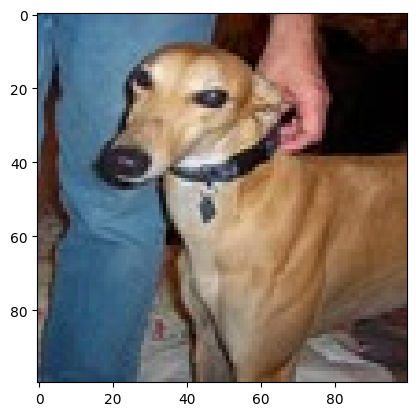

In [6]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

c:\my projects1\mini project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.fit(datagen.flow(x_train, y_train, batch_size = 32),
          epochs = 150,
          validation_data = (x_test, y_test),
          verbose = 1)

Epoch 1/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.5040 - loss: 0.7132 - val_accuracy: 0.5575 - val_loss: 0.6927
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 310ms/step - accuracy: 0.5355 - loss: 0.6920 - val_accuracy: 0.5825 - val_loss: 0.6883
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 360ms/step - accuracy: 0.5200 - loss: 0.6905 - val_accuracy: 0.6025 - val_loss: 0.6833
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.5595 - loss: 0.6849 - val_accuracy: 0.5975 - val_loss: 0.6766
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.5665 - loss: 0.6801 - val_accuracy: 0.6000 - val_loss: 0.6712
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.5780 - loss: 0.6784 - val_accuracy: 0.5650 - val_loss: 0.6756
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - accuracy: 0.5820 - loss: 0.6747 - val_accuracy: 0.6300 - val_loss: 0.6618
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.5920 - loss: 0.6734 - 

In [11]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8300 - loss: 0.3931


[0.3931453227996826, 0.8299999833106995]

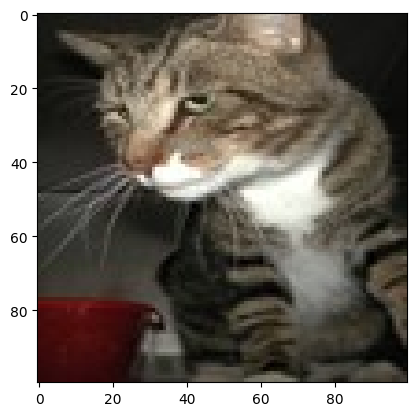

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Our model says it is a:  cat


In [16]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)

In [17]:
model.save('model.h5')
print("saved model to disk")

saved model to disk
